## Github 코드 다운로드 (데이터셋 포함)

### Preprocess된 data는 Time_series_data/dataset/daejeon_subway

In [5]:
!git clone https://github.com/castleeun/Time_series_data.git

fatal: destination path 'Time_series_data' already exists and is not an empty directory.


### 환경 정보
- **운영체제(OS):** Ubuntu 18.04  
- **GPU:** RTX 2080 Ti  

### 개발환경 Dependencies
아래는 프로젝트에 필요한 주요 라이브러리와 버전 정보입니다:

- `einops`: 0.5.0  
- `matplotlib`: 3.7.0  
- `numpy`: 1.23.5  
- `pandas`: 1.5.3  
- `patool`: 1.12  
- `reformer-pytorch`: 1.4.4  
- `scikit-learn`: 1.2.2  
- `scipy`: 1.10.1  
- `sktime`: 0.16.1  
- `sympy`: 1.11.1  
- `torch`: 2.0.0  
- `tqdm`: 4.64.1  

### 특이사항
- **Colab 환경**에서는 일부 Dependency 문제로 인해 버전 명시를 하지 않았습니다.


### Setting up the environment

In [2]:
try:
    import google.colab
    from google.colab import output as colab_output
    colab_output.enable_custom_widget_manager()
    running_in_colab = True
except ImportError:
    running_in_colab = False

In [3]:
import subprocess

if running_in_colab:
    print("running in colab")
    subprocess.run(["pip", "install", "-r", "Time_series_data/requirements-colab.txt"], capture_output=True, text=True)
else:
    subprocess.run(["pip", "install", "-r", "Time_series_data/requirements.txt"], capture_output=True, text=True)

running in colab


### 하이퍼파라미터 설명
#### 제출 시 사용한 하이퍼파라미터 값은 하단에 실행코드에 명시되어있습니다.
- `--task_name`: 수행할 작업의 유형 (예: `long_term_forecast`는 장기 시계열 예측을 의미)
- `--is_training`: 모델의 학습 모드 여부를 지정 (`1`은 학습 모드, `0`은 추론 모드)
- `--seq_len`: 입력 시퀀스 길이 (모델이 예측에 사용할 과거 시점의 수) (31일=620)
- `--label_len`: 학습 시 사용되는 시퀀스 중 레이블의 길이 (1주일=140)
- `--pred_len`: 예측해야 할 미래 시점의 길이 (31일=620)
- `--e_layers` / `--d_layers`: 인코더/디코더의 레이어 수
- `--enc_in` / `--dec_in` / `--c_out`: 입력 및 출력 채널 수 (특성의 개수)
- `--d_model`: 모델의 숨겨진 레이어 차원
- `--batch_size`: 한 번의 학습/추론에서 처리되는 데이터 샘플 수
- `--train_epochs`: 최대 학습 에포크 수. validation loss가 높아지는 overfitting이 3번 발견되는 경우 학습 중단함
- `--num_workers`: 데이터 로더의 병렬 작업자 수 (데이터 준비 속도를 높이기 위해 사용)
- `--factor`: 모델의 특정 알고리즘 동작을 제어 (예: 어텐션 메커니즘에서의 축소 비율)


### Training

In [4]:
import subprocess

# Define the hyperparameters and configurations
model_name = "TimeXer"
description = "Timexer-MS"

# Loop through the dataset indices
for i in range(1101, 1123):
    print(f"training station {i}")
    command = [
        "python3", "-u", "Time_series_data/run.py",
        "--task_name", "long_term_forecast",
        "--is_training", "1",
        "--root_path", "./Time_series_data/dataset/daejeon_subway/final/station/",
        "--data_path", f"{i}.csv",
        "--model_id", f"{i}_80_620_f3_l3_620in",
        "--model", model_name,
        "--data", "custom",
        "--features", "MS",
        "--target", "Count",
        "--seq_len", "620",
        "--label_len", "140",
        "--pred_len", "620",
        "--e_layers", "3",
        "--d_layers", "3",
        "--enc_in", "862",
        "--dec_in", "862",
        "--c_out", "862",
        "--d_model", "512",
        "--des", description,
        "--batch_size", "32",
        "--itr", "1",
        "--use_amp",
        "--train_epochs", "20",
        "--num_workers", "20",
        "--factor", "3",
    ]

    # Execute the command
    result = subprocess.run(command, capture_output=True, text=True)

    # Print the output or error for debugging
    if result.returncode == 0:
        print(f"Execution for {i} completed successfully.")
        print(result.stdout)
    else:
        print(f"Execution for {i} failed with error:")
        print(result.stderr)


training station 1101
Execution for 1101 completed successfully.
True
Args in experiment:
Basic Config
  Task Name:          long_term_forecast  Is Training:        1                   
  Model ID:           1101_80_620_f3_l3_620inModel:              TimeXer             

Data Loader
  Data:               custom              Root Path:          ./Time_series_data/dataset/daejeon_subway/final/station/
  Data Path:          1101.csv            Features:           MS                  
  Target:             Count               Freq:               h                   
  Checkpoints:        ./checkpoints/      

Forecasting Task
  Seq Len:            620                 Label Len:          140                 
  Pred Len:           620                 Seasonal Patterns:  Monthly             
  Inverse:            0                   

Model Parameters
  Top k:              5                   Num Kernels:        6                   
  Enc In:             862                 Dec In:          

KeyboardInterrupt: 

### Inference
#### please set the station number

In [9]:
import subprocess

# Define variables
model_name = "TimeXer"
description = "Timexer-MS"
station = 1101

# Construct the command
command = [
    "python3", "-u", "Time_series_data/run.py",
    "--task_name", "long_term_forecast",
    "--is_training", "0",
    "--root_path", "./Time_series_data/dataset/daejeon_subway/final/one_month_station",
    "--data_path", f"{station}.csv",
    "--model_id", f"{station}_80_620_f3_l3_620in",
    "--model", model_name,
    "--data", "custom",
    "--features", "MS",
    "--target", "Count",
    "--seq_len", "620",
    "--label_len", "140",
    "--pred_len", "620",
    "--e_layers", "3",
    "--d_layers", "3",
    "--enc_in", "862",
    "--dec_in", "862",
    "--c_out", "862",
    "--d_model", "512",
    "--des", description,
    "--batch_size", "1",
    "--itr", "1",
    "--use_amp",
    "--train_epochs", "20",
    "--num_workers", "20",
    "--factor", "3",
    "--inverse",
    "--infer"
]

# Run the command
result = subprocess.run(command, capture_output=True, text=True)

# Output the results
if result.returncode == 0:
    print("Execution completed successfully.")
    print(result.stdout)
else:
    print("Execution failed with the following error:")
    print(result.stderr)

Execution completed successfully.
True
Args in experiment:
Basic Config
  Task Name:          long_term_forecast  Is Training:        0                   
  Model ID:           1101_80_620_f3_l3_620inModel:              TimeXer             

Data Loader
  Data:               custom              Root Path:          ./Time_series_data/dataset/daejeon_subway/final/one_month_station
  Data Path:          1101.csv            Features:           MS                  
  Target:             Count               Freq:               h                   
  Checkpoints:        ./checkpoints/      

Forecasting Task
  Seq Len:            620                 Label Len:          140                 
  Pred Len:           620                 Seasonal Patterns:  Monthly             
  Inverse:            1                   

Model Parameters
  Top k:              5                   Num Kernels:        6                   
  Enc In:             862                 Dec In:             862                

### Visualize results

In [10]:
!pip install pymupdf Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 79.8 MB/s eta 0:00:00


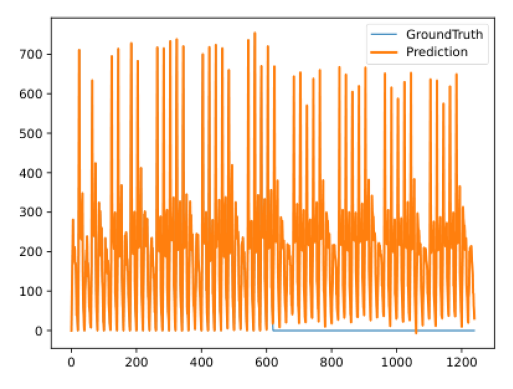

In [18]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image

station = 1101
graph_path = f'./test_results/long_term_forecast_{station}_80_620_f3_l3_620in_TimeXer_custom_ftMS_sl620_ll140_pl620_dm512_nh8_el3_dl3_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Timexer-MS_0/0.pdf'
pix = fitz.open(graph_path)[0].get_pixmap()
image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
plt.imshow(image)
plt.axis('off')
plt.show()


#### Description
`result`는 `(1240, 1)` 형태로 구성되어 있습니다. 앞쪽 절반 `(620, 1)`은 주어진 데이터(10월 1일부터 10월 31일까지)를 나타내며, 뒤쪽 절반 `(620, 1)`은 주어진 데이터를 기반으로 예측한 결과입니다.

#### Submission
본 대회에서 제출해야 하는 12월 1일의 일일 데이터는 `result`의 마지막 20개 데이터에 해당합니다. 단, 1시부터 5시까지의 데이터는 `0`으로 채워 제출합니다.

In [23]:
import numpy as np

station = 1101
result_path = f'./results/long_term_forecast_{station}_80_620_f3_l3_620in_TimeXer_custom_ftMS_sl620_ll140_pl620_dm512_nh8_el3_dl3_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Timexer-MS_0/pred.npy'
result = np.load(result_path)
result = result[0,-20:]
print(result)


[[ 19.139227]
 [ 83.51405 ]
 [ 93.59774 ]
 [113.32669 ]
 [200.8602  ]
 [194.79765 ]
 [210.34561 ]
 [201.39453 ]
 [202.57735 ]
 [214.56541 ]
 [200.67296 ]
 [175.39981 ]
 [168.27547 ]
 [156.80345 ]
 [142.1894  ]
 [ 94.62072 ]
 [ 93.37853 ]
 [ 63.419758]
 [ 50.85168 ]
 [ 30.538168]]
